In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
%config Completer.use_jedi = False

### 디렉토리와 jpeg 파일명을 읽어서 파일의 절대경로 위치와 학습/테스트 데이터 세트 여부와 해당 이미지의 label 값을 설정

In [3]:
# os.walk()를 통해 특정 디렉토리 밑에 있는 모든 하위 디렉토리를 모두 조사한다.

paths = []
dataset_gubuns = []  # 데이터세트 구분
label_gubuns = []

for dirname, _, filenames in os.walk('/kaggle/input/cat-and-dog'):
    for filename in filenames:
        # 이미지 파일이 아닌 파일도 해당 디렉토리에 있다.
        if '.jpg' in filename:
            # 파일의 절대 경로를 file_path 변수에 할당
            file_path = dirname+'/'+filename
            paths.append(file_path)
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else:
                dataset_gubuns.append('N/A')
            
            # 파일의 절대 경로에 dog와 cat의 경우를 각각 구분해서 입력
            if 'dogs' in file_path:
                label_gubuns.append('DOG')
            elif 'cats' in file_path:
                label_gubuns.append('CAT')
            else:
                label_gubuns.append('N/A')


In [4]:
# 데이터 상태 확인
paths[:10], dataset_gubuns[:10], label_gubuns[:10]

(['/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg'],
 ['test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test'],
 ['DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG'])

### 위에서 구분해 만든 배열들을 바탕으로 DataFrame 생성

In [5]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print(data_df.shape)
data_df.head(10)

(10028, 3)


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG
5,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg,test,DOG
6,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg,test,DOG
7,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg,test,DOG
8,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg,test,DOG
9,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg,test,DOG


In [6]:
# 데이터 세트값 분포 및 label 값의 분포를 확인한다.

print(data_df['dataset'].value_counts())
print(data_df['label'].value_counts())

dataset
train    8005
test     2023
Name: count, dtype: int64
label
DOG    5017
CAT    5011
Name: count, dtype: int64


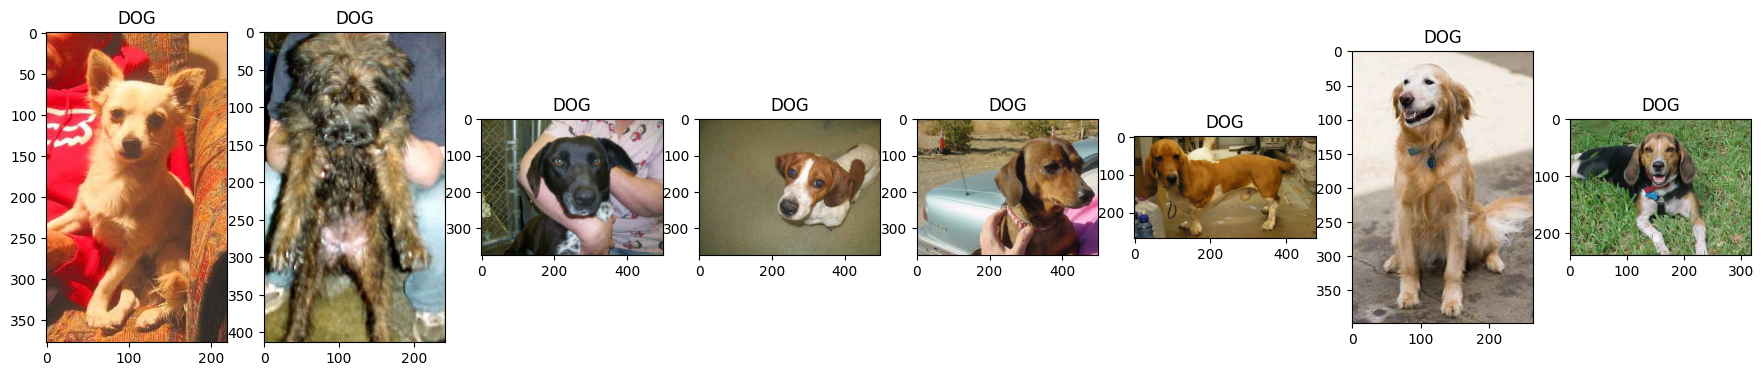

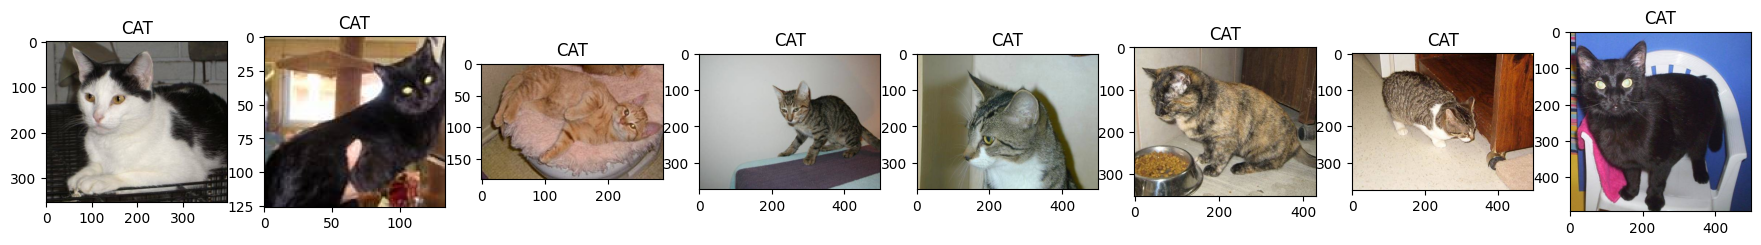

In [7]:
# dog와 cat의 이미지 파일 절대 경로를 cv2.imread()로 읽어서 image array로 로드하고 이미지를 시각화

import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_RGB2BGR)
        axs[i].imshow(image)
        axs[i].set_title(title)
        
dog_image_list = data_df[data_df['label']=='DOG']['path'].iloc[:8].tolist()
show_grid_images(dog_image_list, ncols=8, title='DOG')

cat_image_list = data_df[data_df['label']=='CAT']['path'].iloc[:8].tolist()
show_grid_images(cat_image_list, ncols=8, title='CAT')

In [8]:
for image_path in dog_image_list:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    print(image.shape)

# 각각 height width channel
print(image[:,0,0].shape)  
print(image[0,:,0].shape)
print(image[0,0,:].shape)

# 이미지 전체
print(image)

(377, 221, 3)
(414, 242, 3)
(375, 499, 3)
(375, 499, 3)
(375, 499, 3)
(267, 478, 3)
(399, 266, 3)
(240, 319, 3)
(240,)
(319,)
(3,)
[[[ 65  90  35]
  [ 91 116  61]
  [110 135  80]
  ...
  [154 153 122]
  [150 150 114]
  [113 113  77]]

 [[ 98 123  68]
  [ 84 109  54]
  [ 91 116  61]
  ...
  [148 149 115]
  [141 143 106]
  [119 121  82]]

 [[119 142  88]
  [113 136  82]
  [112 135  81]
  ...
  [138 146 105]
  [130 139  96]
  [129 138  93]]

 ...

 [[116 112  87]
  [ 73  72  44]
  [ 89  90  59]
  ...
  [112 148  86]
  [106 146  83]
  [112 153  87]]

 [[137 136 108]
  [125 124  96]
  [130 131 100]
  ...
  [110 146  84]
  [104 145  79]
  [112 153  87]]

 [[129 128 100]
  [158 159 128]
  [145 146 115]
  ...
  [134 170 106]
  [108 149  83]
  [104 145  79]]]


# 전체적인 흐름

### Preprocessing과 Data Loading 메커니즘
* 기본적으로 generator를 통해서 model에 Tensor로 데이터를 공급하는 과정은 아래와 같다.
* image file을 image array로 load -> preprocessing적용(augmentation, array scale 조정) -> array 크기 resize -> normalization 적용
* label값 인코딩(문자열을 binary 혹은 OHE로 바꾸기) 또한 generator를 통해 해결
* 실제 preprocessing과 data loading은 model에서 fit()을 통해 호출하기 전까진 시행하지 않음

### Preprocessing
* image file을 image array로 변환 시 0 ~ 1 사이의 float32형으로 변경.
* image array size를 고정 크기로 재조정(데이터의 이미지 크기가 재각각인 경우)
* augmentation 적용
* normalization 적용(평균과 표준편차를 이용해 재조정)
* label 값은 binary 혹은 multiple classification에 따라 숫자형 깂 encoding
* multiple classification인 경우 데이터의 OHE 적용여부 결정

### Data Loading
* os에 있는 image 파일을 메모리로 array 형태로 로딩
* 이때 대량의 image 파일을 메모리로 loading 할 경우 메모리가 감당하기 어려워 bath size 단위로 array 로딩한다.

### ImageDataGenerator 객체 생성
* ImageDataGenerator 객체 생성 시 인자로 augmentation과 rescale에 대한 값을 입력받아 preprocessing 환경 형성.

### IamgeDataGenerator 객체의 flow_from_directory(), flow_from_dataframe() 호출
* flow_from_directory()
    1. 생성된 ImageDataGenerator 객체의 flow_from_directory() 메소드를 호출해 Data Loading 환경 설정.
    2. flow_from_directory()는 인자로 입력된 directory에 해당하는 디렉토리에 위치한 서브 디렉토리등에서 모든 image 파일을 검색.
    3. 이때 바로 아래 서브 디렉토리의 이름을 Label로 인식하고, 해당 서브 디렉토리에 있는 이미지들을 해당 Label에 속하는 이미지 파일로 간주
    4. class_mode로 Label Encoding을 자동으로 수행하는데,
        * class_mode='categorical' 일 경우 문자열 label을 OHE.
        * class_mode='sparse' 일 경우 문자열 label을 숫자값으로 인코딩
        * class_mode='binary' 일 경우 문자열 label을 binary로 인코딩
    5. batch size는 한번에 읽어올 파일 개수
    6. target size는 model에 입력하는 이미지의 크기 설정
    7. shuffle은 읽어온 데이터 섞기 여부.
* flow_from_dataframe()
    1. low_from_dataframe()도 data로부터 이미지 파일과 label을 numpy array로 로드.
    2. flow from dataframe은 DataFrame 메타 데이터로부터 업로드
    3. 일반적으로 해당 방식을 더 많이 쓴다.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocessing과 data loading을 동시에 적용
# 하지만 실제 preprocessing과 data loading을 model에서 fit()을 호출하기 전까진 동작하지 않음
train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1/255.0)

# ImageDAtaGenerator 객체의 flow_from_directory() 메소드를 호출
train_flow_gen = train_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/training_set/training_set',
                                              target_size=(224, 224),
                                              class_mode='categorical',  # 해당 옵션을 통해 label의 OHE 적용
                                              batch_size=64
                                              )

2024-02-21 12:14:58.311388: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 12:14:58.311494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 12:14:58.437910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8005 images belonging to 2 classes.


In [10]:
# next()를 flow_from_dircetory()로 반환된 iterator 객체를 호출해 어떤 값이 나오는지 확인
# 값은 튜플형태로 반환되고 튜플의 첫번째 값은 image array, 두번째 값은 label array이다.
# image array는 0 ~ 1 사이 값인 float32로 변환되고 label array는 OHE 된다.
image_array, label_array = next(train_flow_gen)
print(image_array.shape)
print(label_array.shape)
print(image_array[0])
print(label_array[0])

(64, 224, 224, 3)
(64, 2)
[[[0.882353   0.6666667  0.5137255 ]
  [0.8941177  0.6745098  0.54509807]
  [0.89019614 0.67058825 0.5647059 ]
  ...
  [0.80392164 0.62352943 0.427451  ]
  [0.85098046 0.6627451  0.47450984]
  [0.8235295  0.6392157  0.47450984]]

 [[0.8352942  0.6156863  0.47058827]
  [0.83921576 0.627451   0.49411768]
  [0.8470589  0.63529414 0.5254902 ]
  ...
  [0.8000001  0.61960787 0.427451  ]
  [0.82745105 0.64705884 0.454902  ]
  [0.80392164 0.61960787 0.454902  ]]

 [[0.8431373  0.6313726  0.4901961 ]
  [0.854902   0.64705884 0.52156866]
  [0.87843144 0.6666667  0.5568628 ]
  ...
  [0.8000001  0.61960787 0.427451  ]
  [0.81568635 0.63529414 0.4431373 ]
  [0.80392164 0.61960787 0.454902  ]]

 ...

 [[0.17254902 0.14117648 0.09019608]
  [0.11764707 0.10196079 0.05882353]
  [0.09411766 0.10196079 0.05882353]
  ...
  [0.7686275  0.6431373  0.45098042]
  [0.61960787 0.4901961  0.2784314 ]
  [0.60784316 0.40784317 0.20000002]]

 [[0.20392159 0.18039216 0.13333334]
  [0.086274

### Model 생성
* Input의 shape는 vgg, resnet, xception 모델이 원래 학습 이미지 사이즈로 가졌던 224 by 224로 설정
* 이를 위해 flow from directory()로 원본 이미지를 224 by 224로 변환

In [11]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16, ResNet50V2, Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output
    
    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    output = Dense(2, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [13]:
# 위에 flow from directory에서 class mode는 categorical로 설정되어 label은 OHE이 적용된 상태다.
# 따라서 loss는 categorical crossentropy를 적용해야 한다.

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

### 모델의 fit generator()를 호출해 학습 수행
* fit_generator()는 앞에서 생성한 iteratior 객체를 인자로 받아서 image array, label array를 배치 크기만큼 갖고 와서 학습을 수행.
* 입력 인자로 generator는 앞에서 생성한 image_data_generator를 입력
* epochs는 전체 학습 데이터를 갖고 와서 학습하는 횟수

In [14]:
'''
참고로 보면 validation data에 대한 정보가 없는데, 그 이유는 validation을 구분하기 위한 directory가 필요한데
그걸 일일이 os를 통해서 directory를 새로 만들고 데이터 넣어주고 하는 과정이 번거롭다. 
이래서 flow from directory를 잘 안 쓰게 되는거다.
'''

model.fit(train_flow_gen, epochs=15)

Epoch 1/15


I0000 00:00:1708517736.034056      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


126/126 [==============================] - 112s 589ms/step - loss: 0.1402 - accuracy: 0.9467
Epoch 2/15
126/126 [==============================] - 63s 497ms/step - loss: 0.1324 - accuracy: 0.9519
Epoch 3/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0540 - accuracy: 0.9786
Epoch 4/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0416 - accuracy: 0.9861
Epoch 5/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0330 - accuracy: 0.9881
Epoch 6/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 7/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 8/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 9/15
126/126 [==============================] - 63s 497ms/step - loss: 0.0994 - accuracy: 0.9635
Epoch 10/15
126/126 [==============================] - 63s 497ms/step - loss: 0.104

### Test 데이터로 성능 검증

In [15]:
# test 데이터 생성을 위한 generator

test_gen = ImageDataGenerator(rescale=1/255.0)
test_flow_gen = test_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/test_set/test_set',
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            class_mode='categorical',
                                            batch_size=BATCH_SIZE,
                                            shuffle=True
                                            )

Found 2023 images belonging to 2 classes.


In [16]:
model.evaluate(test_flow_gen)

32/32 [==============================] - 24s 726ms/step - loss: 0.0950 - accuracy: 0.9585


[0.09498779475688934, 0.9584774971008301]

In [17]:
pd.set_option('display.max_colwidth',200)

data_df = pd.DataFrame({'path':paths, 'dataset':dataset_gubuns, 'label':label_gubuns})
print(data_df['dataset'].value_counts())
data_df.head(10)

dataset
train    8005
test     2023
Name: count, dtype: int64


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG
5,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg,test,DOG
6,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg,test,DOG
7,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg,test,DOG
8,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg,test,DOG
9,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg,test,DOG


In [18]:
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']

print(train_df.shape)
print(test_df.shape)

(8005, 3)
(2023, 3)


In [19]:
from sklearn.model_selection import train_test_split

# train_test_split()을 이용해서 train용, validation용 DataFrame 생성
# stratify를 이용해 label 값을 균등하게 분할 / 쪼개지는 데이터의 고양이와 강아지의 비율이 전체 데이터 비율에서와 같도록

tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'])

print(tr_df.shape, val_df.shape)
print(tr_df['label'].value_counts())
print(val_df['label'].value_counts())

(6804, 3) (1201, 3)
label
DOG    3404
CAT    3400
Name: count, dtype: int64
label
DOG    601
CAT    600
Name: count, dtype: int64


### 학습과 검증용 ImageDataGenerator 생성
* flow from directory는 인자로 dataframe = 메타 데이터용 DataFrame을 받는다.
* x_col은 메타 데이터용 dataframe에서 image 파일의 절대경로 위치를 나타내는 column명을 의미
* y_col은 메타 데이터용 dataframe에서 label값 column명을 의미. 이때 지정된 column은 반드시 문자열이어야 하고, 데이터 또한 미리 encoding을 적용하면 안 된다.

In [20]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

### 학습용 ImageDataGenerator 생성과 Data generator 처리

In [21]:
tr_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.0)

tr_flow_gen = tr_generator.flow_from_dataframe(dataframe=tr_df, # image file이 있는 디렉토리
                                      x_col='path',
                                      y_col='label',
                                      target_size=(IMAGE_SIZE, IMAGE_SIZE), # 원본 이미지를 최종 resize할 image size
                                      class_mode='binary', # 문자열 label을 자동 Encoding. 
                                      batch_size=BATCH_SIZE,
                                      shuffle=True
                                      )

Found 6804 validated image filenames belonging to 2 classes.


In [22]:
# generator를 만들고 next를 통해 진행상황을 확인하자.

image_array = next(tr_flow_gen)[0]
label_array = next(tr_flow_gen)[1]
print(image_array.shape)
print(label_array.shape)
print(image_array[0])
print(label_array[0])

(64, 224, 224, 3)
(64,)
[[[0.14117648 0.1764706  0.21176472]
  [0.10196079 0.13725491 0.17254902]
  [0.12156864 0.15686275 0.19215688]
  ...
  [0.07450981 0.07450981 0.07450981]
  [0.07058824 0.07058824 0.07058824]
  [0.0627451  0.0627451  0.0627451 ]]

 [[0.09019608 0.1254902  0.16078432]
  [0.0509804  0.08627451 0.12156864]
  [0.04313726 0.07843138 0.1137255 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.10588236 0.14117648 0.1764706 ]
  [0.06666667 0.10196079 0.13725491]
  [0.05882353 0.09411766 0.12941177]
  ...
  [0.01960784 0.01960784 0.01960784]
  [0.01568628 0.01568628 0.01568628]
  [0.00784314 0.00784314 0.00784314]]

 ...

 [[0.227451   0.27058825 0.5803922 ]
  [0.16470589 0.20784315 0.5176471 ]
  [0.20000002 0.24313727 0.5529412 ]
  ...
  [0.14901961 0.18431373 0.454902  ]
  [0.14901961 0.18431373 0.454902  ]
  [0.13333334 0.16862746 0.43921572]]

 [[0.20784315 0.2509804  0.56078434]
  [0.18039216

### 검증용 ImageDataGenerator 생성과 data generator 처리

In [23]:
val_df.head(10)

,path,dataset,label
3103,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2220.jpg,train,DOG
3616,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3417.jpg,train,DOG
9246,/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1572.jpg,train,CAT
4872,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2009.jpg,train,DOG
4392,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2710.jpg,train,DOG
8036,/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3427.jpg,train,CAT
7909,/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2552.jpg,train,CAT
2262,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2983.jpg,train,DOG
4616,/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2650.jpg,train,DOG
9210,/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.360.jpg,train,CAT


In [24]:
# 검증용 ImageDataGenerator는 rescale만 적용

val_gen = ImageDataGenerator(rescale=1/255.0)
val_flow_gen = val_gen.flow_from_dataframe(val_df,
                                          x_col='path',
                                          y_col='label',
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          class_mode='binary',
                                          batch_size=BATCH_SIZE,
                                          shuffle=False
                                          )

Found 1201 validated image filenames belonging to 2 classes.


### 모델 생성

In [25]:
def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [26]:
model = create_model(model_name='xception')
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

model.fit(tr_flow_gen, epochs=15, validation_data=val_flow_gen, callbacks=[rlr_cb, ely_cb])

Epoch 1/15
107/107 [==============================] - 87s 604ms/step - loss: 0.1304 - accuracy: 0.9509 - val_loss: 0.1482 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 58s 536ms/step - loss: 0.0633 - accuracy: 0.9762 - val_loss: 0.1656 - val_accuracy: 0.9592 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - 58s 536ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.0842 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 4/15
107/107 [==============================] - 58s 537ms/step - loss: 0.0414 - accuracy: 0.9841 - val_loss: 0.1085 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 5/15
107/107 [==============================] - 57s 536ms/step - loss: 0.0273 - accuracy: 0.9896 - val_loss: 0.0694 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 6/15
107/107 [==============================] - 58s 536ms/step - loss: 0.0298 - accuracy: 0.9894 - val_loss: 0.0807 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 7/15
107/107 [==============================] 

In [27]:
test_generator = ImageDataGenerator(rescale=1/255.0)

test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df,
                                                  x_col='path',
                                                  y_col='label',
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  class_mode='binary',
                                                  batch_size=BATCH_SIZE,
                                                  shuffle=False
                                                  )

model.evaluate(test_flow_gen)

Found 2023 validated image filenames belonging to 2 classes.
32/32 [==============================] - 7s 205ms/step - loss: 0.0736 - accuracy: 0.9837


[0.07360617816448212, 0.9836875796318054]